In [1]:
# pip install nba_api

In [2]:
from nba_api.stats.static import players
from nba_api.stats.static import teams

In [3]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# ignore_warnings = np.seterr(divide='ignore', invalid='ignore')

In [4]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    
    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # outer Lines
    outer_lines1 = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill = False)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc,center_outer_arc,center_inner_arc,outer_lines1]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [5]:
# players.find_players_by_full_name('Michael')

In [6]:
# teams.find_teams_by_full_name('Bulls')

In [7]:
#all teams df
all_teams = teams.get_teams()
all_teams_df = pd.DataFrame(all_teams) 
all_teams_df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [8]:
# #all players df
# all_players = players.get_players()
# all_players_df = pd.DataFrame(all_players) 
# all_players_df.head()

In [9]:
#If player name = "player", populate shot chart detail parameter "player_id" with 'id' from:
player = input("Enter an NBA players full name i.e 'Michael Jordan' or 'Stephen Curry':\nYou picked ")

def get_players(player_name):
    player_dic = players.find_players_by_full_name(player_name)
    return player_dic

def get_player_id(player_name):
    player_dic = get_players(player_name)
    player_id = player_dic[0]['id']
    player_id = str(player_id)
    return player_id

get_player_id(player)

Enter an NBA players full name i.e 'Michael Jordan' or 'Stephen Curry':
You picked Dirk Nowitzki


'1717'

In [10]:
get_players(player)

[{'id': 1717,
  'full_name': 'Dirk Nowitzki',
  'first_name': 'Dirk',
  'last_name': 'Nowitzki',
  'is_active': False}]

In [11]:
# from matplotlib.offsetbox import OffsetImage
# import urllib.request

# url = f"http://stats.nba.com/media/players/230x185/{int(get_player_id(player))}.png"
# url1 = f"{get_player_id(player)}.png"

# pic = urllib.request.urlretrieve((url),(url1))

# player_pic = plt.imread(pic[0])

# # ## plot the image
# # plt.imshow(player_pic)
# # plt.show()

# Basic Stats

In [12]:
#Create Shot Chart Dataframe
from nba_api.stats.endpoints import shotchartdetail

shot_df =  shotchartdetail.ShotChartDetail(
    team_id = 0,
    player_id = get_player_id(player),
    season_nullable = '',
#     date_from_nullable='1995-01-01',
#     date_to_nullable='2020-12-31',
    context_measure_simple='FGA'
)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
shot_df = shot_df.get_data_frames()[0]
shot_df.index = shot_df.index + 1

In [13]:
from nba_api.stats.endpoints import playercareerstats

#Create original dataframe (all seasons)
player_career = playercareerstats.PlayerCareerStats(player_id = get_player_id(player))
player_career_stats_df = player_career.get_data_frames()[0]
player_career_stats_df.index = player_career_stats_df.index + 1
pd.set_option('max_columns', None)
player_career_stats_df.head()

#Parse and filter original dataframe as desired
season_averages_necessary_info = player_career_stats_df.loc[:,('PLAYER_ID','SEASON_ID','TEAM_ID','GP')]
season_averages_percents = player_career_stats_df.loc[:,('FG_PCT','FG3_PCT','FT_PCT')]
season_averages_percents = season_averages_percents * 100
season_averages_from_totals = round(player_career_stats_df.loc[:,('PTS','REB','AST','STL','BLK', 'TOV', 'PF','FGM','FGA','FG3M','FG3A','FTM','FTA')].div(player_career_stats_df['GP'],axis=0),1)

#Create new dataframe
all_season_averages_df = pd.concat([season_averages_necessary_info, season_averages_from_totals,season_averages_percents], axis=1, join='inner')
career_averages_df = round(all_season_averages_df.loc[:,('GP','PTS','REB','AST','STL','BLK', 'TOV', 'PF','FGM','FGA','FG3M','FG3A','FTM','FTA','FG_PCT','FG3_PCT','FT_PCT')].mean(),2)
career_averages_df = pd.DataFrame(career_averages_df).transpose()

career_averages_df

all_season_averages_df

,PLAYER_ID,SEASON_ID,TEAM_ID,GP,PTS,REB,AST,STL,BLK,TOV,PF,FGM,FGA,FG3M,FG3A,FTM,FTA,FG_PCT,FG3_PCT,FT_PCT
1,1717,1998-99,1610612742,47,8.2,3.4,1.0,0.6,0.6,1.6,2.2,2.9,7.1,0.3,1.4,2.1,2.7,40.5,20.6,77.3
2,1717,1999-00,1610612742,82,17.5,6.5,2.5,0.8,0.8,1.7,3.1,6.3,13.6,1.4,3.7,3.5,4.2,46.1,37.9,83.0
3,1717,2000-01,1610612742,82,21.8,9.2,2.1,1.0,1.2,1.9,3.0,7.2,15.2,1.8,4.8,5.5,6.6,47.4,38.7,83.8
4,1717,2001-02,1610612742,76,23.4,9.9,2.4,1.1,1.0,1.9,2.9,7.9,16.6,1.8,4.6,5.8,6.8,47.7,39.7,85.3
5,1717,2002-03,1610612742,80,25.1,9.9,3.0,1.4,1.0,1.9,2.6,8.6,18.6,1.8,4.9,6.0,6.8,46.3,37.9,88.1
6,1717,2003-04,1610612742,77,21.8,8.7,2.7,1.2,1.4,1.8,2.8,7.9,17.0,1.3,3.8,4.8,5.5,46.2,34.1,87.7
7,1717,2004-05,1610612742,78,26.1,9.7,3.1,1.2,1.5,2.3,2.8,8.5,18.5,1.2,2.9,7.9,9.1,45.9,39.9,86.9
8,1717,2005-06,1610612742,81,26.6,9.0,2.8,0.7,1.0,1.9,2.0,9.3,19.3,1.4,3.3,6.7,7.4,48.0,40.6,90.1
9,1717,2006-07,1610612742,78,24.6,8.9,3.4,0.7,0.8,2.1,2.2,8.6,17.2,0.9,2.2,6.4,7.1,50.2,41.6,90.4
10,1717,2007-08,1610612742,77,23.6,8.6,3.5,0.7,0.9,2.1,2.6,8.2,17.1,1.0,2.9,6.2,7.1,47.9,35.9,87.9


In [14]:
#Dateframes for totals 
total_shots_taken = shot_df.shape[0]
made_shot_df = shot_df[shot_df['SHOT_MADE_FLAG']==1]
total_shots_made = made_shot_df.EVENT_TYPE.count()

total_shots_percent = '{percent:.1%}'.format(percent = (total_shots_made/total_shots_taken))

In [15]:
#Get individual values to be placed on graph

career_averages_df_bold = 'Career Averages'

pts = (f'''Points: {round(float(career_averages_df['PTS']),1)}''')
reb = (f'''Rebounds: {round(float(career_averages_df['REB']),1)}''')
ast = (f'''Assists: {round(float(career_averages_df['AST']),1)}''')
stl = (f'''Steals: {round(float(career_averages_df['STL']),1)}''')
blk = (f'''Blocks: {round(float(career_averages_df['BLK']),1)}''')
tov = (f'''Turnovers: {round(float(career_averages_df['TOV']),1)}''')
pf = (f'''Fouls: {round(float(career_averages_df['PF']),1)}''')
fgm_fga_pg = (f'''Fg's: {round(float(career_averages_df['FGM']),1)}/{round(float(career_averages_df['FGA']),1)}''')
fg_pct = (f'''Fg%: {round(float(career_averages_df['FG_PCT']),1)}%''')
fg3m_fg3a_pg = (f'''3pt's: {round(float(career_averages_df['FG3M']),1)}/{round(float(career_averages_df['FG3A']),1)}''')
fg3_pct = (f'''3pt%: {round(float(career_averages_df['FG3_PCT']),1)}%''')
ft_pct = (f'''Ft%: {round(float(career_averages_df['FT_PCT']),1)}%''')
ftm_fta_pg = (f'''Ft's: {round(float(career_averages_df['FTM']),1)}/{round(float(career_averages_df['FTA']),1)}''')

t_shots = (f'''{total_shots_made}/{total_shots_taken}''')


career_averages = (f'''
{pts}
{reb}
{ast}
{stl}
{blk}
{tov}
{pf}

{fgm_fga_pg}
{fg3m_fg3a_pg}
{ftm_fta_pg}

{fg_pct}
{fg3_pct}
{ft_pct}

      ''')


In [16]:
##Percentage Data Frames Option 1

# mid_range_totals
mid_range_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Mid-Range']
mid_range_totals.name = "mid-range"
# center_3_totals
center_3_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Above the Break 3']
center_3_totals.name = "center 3"
# ra_totals
ra_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Restricted Area']
ra_totals.name = 'restricted area'

# l_corner_3_totals
l_corner_3_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Left Corner 3']
l_corner_3_totals.name = 'left corner 3'

# paint_totals
paint_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'In The Paint (Non-RA)']
paint_totals.name = 'in the paint'

# r_corner_3_totals
r_corner_3_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Right Corner 3']
r_corner_3_totals.name = 'right corner 3'

# backcourt_totals
backcourt_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Backcourt']
backcourt_totals.name = 'backcourt'

In [17]:
## Mid-range

# Attempted = 0 and made = 0 
if mid_range_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative1 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        mid_range_missed = df_alternative1['EVENT_TYPE'][0]
        mid_range_made = df_alternative1['EVENT_TYPE'][1]
        mid_range_taken = mid_range_made + mid_range_missed
        mid_range_percent = '0.0%'   
        mid_range_summary = (f'''He shot {mid_range_made}/{mid_range_taken} from the {mid_range_totals.name}, making {mid_range_percent} of them.
This means he took {round((mid_range_made/total_shots_taken)*100,1)}% of his total shots from the {mid_range_totals.name}.''')
        mid_range_summary_plot = (f'''--Mid-range--
FGM/FGA:          {mid_range_made}/{mid_range_taken}
% From Spot:      {mid_range_percent}
% of Total Shots: {round((mid_range_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in mid_range_totals['EVENT_TYPE'].unique():
        mid_range_shots = mid_range_totals.loc[:,'EVENT_TYPE'].value_counts()
        mid_range_taken = mid_range_shots['Missed Shot']
        mid_range_percent = '{percent:.1%}'.format(percent = (0/mid_range_taken))
        mid_range_summary = (f'''He shot {0}/{mid_range_taken} from the {mid_range_totals.name}, making {mid_range_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {mid_range_totals.name}.''')
        mid_range_summary_plot = (f'''--Mid-range--        
FGM/FGA:          {0}/{mid_range_taken}
% From Spot:      {mid_range_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, mid_range_taken]})
        df_alternative1 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        mid_range_shots = mid_range_totals.loc[:,'EVENT_TYPE'].value_counts()
        mid_range_made = mid_range_shots['Made Shot']
        mid_range_taken = mid_range_shots['Missed Shot'] + mid_range_shots['Made Shot']
        mid_range_percent = '{percent:.1%}'.format(percent = (mid_range_made/mid_range_taken)) 
        mid_range_summary = (f'''He shot {mid_range_made}/{mid_range_taken} from the {mid_range_totals.name}, making {mid_range_percent} of them.
This means he took {round((mid_range_made/total_shots_taken)*100,1)}% of his total shots from the {mid_range_totals.name}.''')
        mid_range_summary_plot = (f'''--Mid-range--
FGM/FGA:          {mid_range_made}/{mid_range_taken} 
% From Spot:      {mid_range_percent}
% of Total Shots: {round((mid_range_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative1 = mid_range_shots.to_frame()
        
# df_alternative1

## Center 3

# Attempted = 0 and made = 0 
if center_3_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative2 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        center_3_missed = df_alternative2['EVENT_TYPE'][0]
        center_3_made = df_alternative2['EVENT_TYPE'][1]
        center_3_taken = center_3_made + center_3_missed
        center_3_percent = '0.0%'   
        center_3_summary = (f'''He shot {center_3_made}/{center_3_taken} from the {center_3_totals.name}, making {center_3_percent} of them.
This means he took {round((center_3_made/total_shots_taken)*100,1)}% of his total shots from the {center_3_totals.name}.''')
        center_3_summary_plot = (f'''--Center 3--
FGM/FGA:          {center_3_made}/{center_3_taken}
% From Spot:      {center_3_percent}
% of Total Shots: {round((center_3_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in center_3_totals['EVENT_TYPE'].unique():
        center_3_shots = center_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        center_3_taken = center_3_shots['Missed Shot']
        center_3_percent = '{percent:.1%}'.format(percent = (0/center_3_taken))
        center_3_summary = (f'''He shot {0}/{center_3_taken} from the {center_3_totals.name}, making {center_3_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {center_3_totals.name}.''')
        center_3_summary_plot = (f'''--Center 3--     
FGM/FGA:          {0}/{center_3_taken}
% From Spot:      {center_3_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, center_3_taken]})
        df_alternative2 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        center_3_shots = center_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        center_3_made = center_3_shots['Made Shot']
        center_3_taken = center_3_shots['Missed Shot'] + center_3_shots['Made Shot']
        center_3_percent = '{percent:.1%}'.format(percent = (center_3_made/center_3_taken)) 
        center_3_summary = (f'''He shot {center_3_made}/{center_3_taken} from the {center_3_totals.name}, making {center_3_percent} of them.
This means he took {round((center_3_made/total_shots_taken)*100,1)}% of his total shots from the {center_3_totals.name}.''')
        center_3_summary_plot = (f'''--Center 3--
FGM/FGA:          {center_3_made}/{center_3_taken} 
% From Spot:      {center_3_percent}
% of Total Shots: {round((center_3_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative2 = center_3_shots.to_frame()
        
# df_alternative2

## Restricted Area

# Attempted = 0 and made = 0 
if ra_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative3 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        ra_missed = df_alternative3['EVENT_TYPE'][0]
        ra_made = df_alternative3['EVENT_TYPE'][1]
        ra_taken = ra_made + ra_missed
        ra_percent = '0.0%'   
        ra_summary = (f'''He shot {ra_made}/{ra_taken} from the {ra_totals.name}, making {ra_percent} of them.
This means he took {round((ra_made/total_shots_taken)*100,1)}% of his total shots from the {ra_totals.name}.''')
        ra_summary_plot = (f'''--Restricted Area--
FGM/FGA:          {ra_made}/{ra_taken}
% From Spot:      {ra_percent}
% of Total Shots: {round((ra_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in ra_totals['EVENT_TYPE'].unique():
        ra_shots = ra_totals.loc[:,'EVENT_TYPE'].value_counts()
        ra_taken = ra_shots['Missed Shot']
        ra_percent = '{percent:.1%}'.format(percent = (0/ra_taken))
        ra_summary = (f'''He shot {0}/{ra_taken} from the {ra_totals.name}, making {ra_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {ra_totals.name}.''')
        ra_summary_plot = (f'''--Restricted Area--        
FGM/FGA:          {0}/{ra_taken}
% From Spot:      {ra_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, ra_taken]})
        df_alternative3 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        ra_shots = ra_totals.loc[:,'EVENT_TYPE'].value_counts()
        ra_made = ra_shots['Made Shot']
        ra_taken = ra_shots['Missed Shot'] + ra_shots['Made Shot']
        ra_percent = '{percent:.1%}'.format(percent = (ra_made/ra_taken)) 
        ra_summary = (f'''He shot {ra_made}/{ra_taken} from the {ra_totals.name}, making {ra_percent} of them.
This means he took {round((ra_made/total_shots_taken)*100,1)}% of his total shots from the {ra_totals.name}.''')
        ra_summary_plot = (f'''--Restricted Area--
FGM/FGA:          {ra_made}/{ra_taken} 
% From Spot:      {ra_percent}
% of Total Shots: {round((ra_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative3 = ra_shots.to_frame()
        
# df_alternative3

## Left Corner 3

# Attempted = 0 and made = 0 
if l_corner_3_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative4 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        l_corner_3_missed = df_alternative4['EVENT_TYPE'][0]
        l_corner_3_made = df_alternative4['EVENT_TYPE'][1]
        l_corner_3_taken = l_corner_3_made + l_corner_3_missed
        l_corner_3_percent = '0.0%'   
        l_corner_3_summary = (f'''He shot {l_corner_3_made}/{l_corner_3_taken} from the {l_corner_3_totals.name}, making {l_corner_3_percent} of them.
This means he took {round((l_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {l_corner_3_totals.name}.''')
        l_corner_3_summary_plot = (f'''--Left Corner 3--
FGM/FGA:          {l_corner_3_made}/{l_corner_3_taken}
% From Spot:      {l_corner_3_percent}
% of Total Shots: {round((l_corner_3_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in l_corner_3_totals['EVENT_TYPE'].unique():
        l_corner_3_shots = l_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        l_corner_3_taken = l_corner_3_shots['Missed Shot']
        l_corner_3_percent = '{percent:.1%}'.format(percent = (0/l_corner_3_taken))
        l_corner_3_summary = (f'''He shot {0}/{l_corner_3_taken} from the {l_corner_3_totals.name}, making {l_corner_3_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {l_corner_3_totals.name}.''')
        l_corner_3_summary_plot = (f'''--Left Corner 3--      
FGM/FGA:          {0}/{l_corner_3_taken}
% From Spot:      {l_corner_3_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, l_corner_3_taken]})
        df_alternative4 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        l_corner_3_shots = l_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        l_corner_3_made = l_corner_3_shots['Made Shot']
        l_corner_3_taken = l_corner_3_shots['Missed Shot'] + l_corner_3_shots['Made Shot']
        l_corner_3_percent = '{percent:.1%}'.format(percent = (l_corner_3_made/l_corner_3_taken)) 
        l_corner_3_summary = (f'''He shot {l_corner_3_made}/{l_corner_3_taken} from the {l_corner_3_totals.name}, making {l_corner_3_percent} of them.
This means he took {round((l_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {l_corner_3_totals.name}.''')
        l_corner_3_summary_plot = (f'''--Left Corner 3--
FGM/FGA:          {l_corner_3_made}/{l_corner_3_taken} 
% From Spot:      {l_corner_3_percent}
% of Total Shots: {round((l_corner_3_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative4 = l_corner_3_shots.to_frame()
        
# df_alternative4

## Paint

# Attempted = 0 and made = 0 
if paint_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative5 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        paint_missed = df_alternative5['EVENT_TYPE'][0]
        paint_made = df_alternative5['EVENT_TYPE'][1]
        paint_taken = paint_made + paint_missed
        paint_percent = '0.0%'   
        paint_summary = (f'''He shot {paint_made}/{paint_taken} from the {paint_totals.name}, making {paint_percent} of them.
This means he took {round((paint_made/total_shots_taken)*100,1)}% of his total shots from the {paint_totals.name}.''')
        paint_summary_plot = (f'''--In the Paint--
FGM/FGA:          {paint_made}/{paint_taken}
% From Spot:      {paint_percent}
% of Total Shots: {round((paint_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in paint_totals['EVENT_TYPE'].unique():
        paint_shots = paint_totals.loc[:,'EVENT_TYPE'].value_counts()
        paint_taken = paint_shots['Missed Shot']
        paint_percent = '{percent:.1%}'.format(percent = (0/paint_taken))
        paint_summary = (f'''He shot {0}/{paint_taken} from the {paint_totals.name}, making {paint_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {paint_totals.name}.''')
        paint_summary_plot = (f'''--In the Paint--        
FGM/FGA:          {0}/{paint_taken}
% From Spot:      {paint_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, paint_taken]})
        df_alternative5 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        paint_shots = paint_totals.loc[:,'EVENT_TYPE'].value_counts()
        paint_made = paint_shots['Made Shot']
        paint_taken = paint_shots['Missed Shot'] + paint_shots['Made Shot']
        paint_percent = '{percent:.1%}'.format(percent = (paint_made/paint_taken)) 
        paint_summary = (f'''He shot {paint_made}/{paint_taken} from the {paint_totals.name}, making {paint_percent} of them.
This means he took {round((paint_made/total_shots_taken)*100,1)}% of his total shots from the {paint_totals.name}.''')
        paint_summary_plot = (f'''--In the Paint--
FGM/FGA:          {paint_made}/{paint_taken} 
% From Spot:      {paint_percent}
% of Total Shots: {round((paint_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative5 = paint_shots.to_frame()
        
# df_alternative5

## Right Corner 3

# Attempted = 0 and made = 0 
if r_corner_3_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative6 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        r_corner_3_missed = df_alternative6['EVENT_TYPE'][0]
        r_corner_3_made = df_alternative6['EVENT_TYPE'][1]
        r_corner_3_taken = r_corner_3_made + r_corner_3_missed
        r_corner_3_percent = '0.0%'   
        r_corner_3_summary = (f'''He shot {r_corner_3_made}/{r_corner_3_taken} from the {r_corner_3_totals.name}, making {r_corner_3_percent} of them.
This means he took {round((r_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {r_corner_3_totals.name}.''')
        r_corner_3_summary_plot = (f'''--Right Corner 3--
FGM/FGA:          {r_corner_3_made}/{r_corner_3_taken}
% From Spot:      {r_corner_3_percent}
% of Total Shots: {round((r_corner_3_taken/total_shots_taken)*100,1)}%''')
# Attemped > 0 and made = 0   
elif 'Made Shot' not in r_corner_3_totals['EVENT_TYPE'].unique():
        r_corner_3_shots = r_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        r_corner_3_taken = r_corner_3_shots['Missed Shot']
        r_corner_3_percent = '{percent:.1%}'.format(percent = (0/r_corner_3_taken))
        r_corner_3_summary = (f'''He shot {0}/{r_corner_3_taken} from the {r_corner_3_totals.name}, making {r_corner_3_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {r_corner_3_totals.name}.''')
        r_corner_3_summary_plot = (f'''--Right Corner 3--    
FGM/FGA:          {0}/{r_corner_3_taken}
% From Spot:      {r_corner_3_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, r_corner_3_taken]})
        df_alternative6 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        r_corner_3_shots = r_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        r_corner_3_made = r_corner_3_shots['Made Shot']
        r_corner_3_taken = r_corner_3_shots['Missed Shot'] + r_corner_3_shots['Made Shot']
        r_corner_3_percent = '{percent:.1%}'.format(percent = (r_corner_3_made/r_corner_3_taken)) 
        r_corner_3_summary = (f'''He shot {r_corner_3_made}/{r_corner_3_taken} from the {r_corner_3_totals.name}, making {r_corner_3_percent} of them.
This means he took {round((r_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {r_corner_3_totals.name}.''')
        r_corner_3_summary_plot = (f'''--Right Corner 3--
FGM/FGA:          {r_corner_3_made}/{r_corner_3_taken} 
% From Spot:      {r_corner_3_percent}
% of Total Shots: {round((r_corner_3_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative6 = r_corner_3_shots.to_frame()
        
# df_alternative6

## Backcourt

# Attempted = 0 and made = 0 
if backcourt_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative7 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        backcourt_missed = df_alternative7['EVENT_TYPE'][0]
        backcourt_made = df_alternative7['EVENT_TYPE'][1]
        backcourt_taken = backcourt_made + backcourt_missed
        backcourt_percent = '0.0%'   
        backcourt_summary = (f'''He shot {backcourt_made}/{backcourt_taken} from the {backcourt_totals.name}, making {backcourt_percent} of them.
This means he took {round((backcourt_made/total_shots_taken)*100,1)}% of his total shots from the {backcourt_totals.name}.''')
        backcourt_summary_plot = (f'''Beyond Half
FGM/FGA:          {backcourt_made}/{backcourt_taken}
% From Spot:      {backcourt_percent}
% of Total Shots: {round((backcourt_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in backcourt_totals['EVENT_TYPE'].unique():
        backcourt_shots = backcourt_totals.loc[:,'EVENT_TYPE'].value_counts()
        backcourt_taken = backcourt_shots['Missed Shot']
        backcourt_percent = '{percent:.1%}'.format(percent = (0/backcourt_taken))
        backcourt_summary = (f'''He shot {0}/{backcourt_taken} from the {backcourt_totals.name}, making {backcourt_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {backcourt_totals.name}.''')
        backcourt_summary_plot = (f'''--Beyond Half--       
FGM/FGA:          {0}/{backcourt_taken}
% From Spot:      {backcourt_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, backcourt_taken]})
        df_alternative7 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        backcourt_shots = backcourt_totals.loc[:,'EVENT_TYPE'].value_counts()
        backcourt_made = backcourt_shots['Made Shot']
        backcourt_taken = backcourt_shots['Missed Shot'] + backcourt_shots['Made Shot']
        backcourt_percent = '{percent:.1%}'.format(percent = (backcourt_made/backcourt_taken)) 
        backcourt_summary = (f'''He shot {backcourt_made}/{backcourt_taken} from the {backcourt_totals.name}, making {backcourt_percent} of them.
This means he took {round((backcourt_made/total_shots_taken)*100,1)}% of his total shots from the {backcourt_totals.name}.''')
        backcourt_summary_plot = (f'''--Beyond Half--
FGM/FGA:          {backcourt_made}/{backcourt_taken} 
% From Spot:      {backcourt_percent}
% of Total Shots: {round((backcourt_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative7 = backcourt_shots.to_frame()
        
# df_alternative7

In [18]:
##Percentage Data Frames Option 2

# # for loop to print out the % of made shots in the top 5 spots for most taken shots
# for df in all_these_dfs:
    
#Right Side Shots df (totals)
right_side_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Right Side(R)']
right_side_2s = right_side_shots_df[right_side_shots_df.SHOT_TYPE =='2PT Field Goal']
right_side_3s = right_side_shots_df[right_side_shots_df.SHOT_TYPE =='3PT Field Goal']


#left side shots df (totals)
left_side_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Left Side(L)']
left_side_2s = left_side_shots_df[left_side_shots_df.SHOT_TYPE =='2PT Field Goal']
left_side_3s = left_side_shots_df[left_side_shots_df.SHOT_TYPE =='3PT Field Goal']
is_left_side_3s_empty = left_side_3s.empty


#Right Side Shots df (totals)
right_center_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Right Side Center(RC)']
right_center_2s = right_center_shots_df[right_center_shots_df.SHOT_TYPE =='2PT Field Goal']
right_center_3s = right_center_shots_df[right_center_shots_df.SHOT_TYPE =='3PT Field Goal']


#left side shots df (totals)
left_center_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Left Side Center(LC)']
left_center_2s = left_center_shots_df[left_center_shots_df.SHOT_TYPE =='2PT Field Goal']
left_center_3s = left_center_shots_df[left_center_shots_df.SHOT_TYPE =='3PT Field Goal']



#Center shots df (totals)
center_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Center(C)']
center_2s = center_shots_df[center_shots_df.SHOT_TYPE =='2PT Field Goal']
center_3s = center_shots_df[center_shots_df.SHOT_TYPE =='3PT Field Goal']


#backcout shots df (totals)
backcourt_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Back Court(BC)']

# Advanced Stats

In [19]:
#Get advanced stat data from basketball reference 

#pip install basketball_reference_web_scraper

from basketball_reference_web_scraper import client

# Get advanced season statistics for all players based on the user selected year
year_ex = 1998

def players_advanced_season(year, player_name):
    '''This function scrapes all players advanced stats from basketball reference.
       It returns all players in the leagues from a specific year. '''
    br_data = client.players_advanced_season_totals(season_end_year=year)

    br_data = pd.DataFrame(br_data)

    #get a specific player from the webscraped bleacher report data
    player_name = pd.DataFrame(get_players(player_name))
    player_name.rename(columns={'full_name':'name'}, inplace=True)

    merge_df = pd.merge(br_data, player_name, on="name")
    merge_df["true_shooting_percentage"] = merge_df["true_shooting_percentage"] * 100
    merge_df['year'] = year

    advanced_stat_df = merge_df[['year','id','name','slug','player_efficiency_rating','true_shooting_percentage','win_shares','box_plus_minus','value_over_replacement_player']]
    
    return advanced_stat_df

# players_advanced_season(2010, 'James Harden')

In [20]:
def year_plus_one(x=2020,player='Michael Jordan'):
    for idx , year in enumerate(range(1996,x+1)):
        if idx == 0:
            br_data = players_advanced_season(year,player)
        else:
            temp_data = players_advanced_season(year,player)
            br_data = br_data.append(temp_data)           
    return br_data

In [21]:
advanced_stat_df = year_plus_one(player=player, x= 2020)
advanced_stat_df

,year,id,name,slug,player_efficiency_rating,true_shooting_percentage,win_shares,box_plus_minus,value_over_replacement_player
0,1999,1717,Dirk Nowitzki,nowitdi01,12.8,49.1,0.8,-2.5,-0.1
0,2000,1717,Dirk Nowitzki,nowitdi01,17.5,56.4,8.1,1.6,2.6
0,2001,1717,Dirk Nowitzki,nowitdi01,22.8,60.1,14.6,5.4,5.9
0,2002,1717,Dirk Nowitzki,nowitdi01,24.1,59.9,13.4,5.5,5.5
0,2003,1717,Dirk Nowitzki,nowitdi01,25.6,58.1,16.1,7.2,7.3
0,2004,1717,Dirk Nowitzki,nowitdi01,22.5,56.1,11.5,3.8,4.3
0,2005,1717,Dirk Nowitzki,nowitdi01,26.1,57.8,15.6,7.3,7.1
0,2006,1717,Dirk Nowitzki,nowitdi01,28.1,58.9,17.7,8.1,7.9
0,2007,1717,Dirk Nowitzki,nowitdi01,27.6,60.5,16.3,8.3,7.4
0,2008,1717,Dirk Nowitzki,nowitdi01,24.6,58.5,12.9,6.6,6.0


In [22]:
advanced_stat_df.reset_index()

,index,year,id,name,slug,player_efficiency_rating,true_shooting_percentage,win_shares,box_plus_minus,value_over_replacement_player
0,0,1999,1717,Dirk Nowitzki,nowitdi01,12.8,49.1,0.8,-2.5,-0.1
1,0,2000,1717,Dirk Nowitzki,nowitdi01,17.5,56.4,8.1,1.6,2.6
2,0,2001,1717,Dirk Nowitzki,nowitdi01,22.8,60.1,14.6,5.4,5.9
3,0,2002,1717,Dirk Nowitzki,nowitdi01,24.1,59.9,13.4,5.5,5.5
4,0,2003,1717,Dirk Nowitzki,nowitdi01,25.6,58.1,16.1,7.2,7.3
5,0,2004,1717,Dirk Nowitzki,nowitdi01,22.5,56.1,11.5,3.8,4.3
6,0,2005,1717,Dirk Nowitzki,nowitdi01,26.1,57.8,15.6,7.3,7.1
7,0,2006,1717,Dirk Nowitzki,nowitdi01,28.1,58.9,17.7,8.1,7.9
8,0,2007,1717,Dirk Nowitzki,nowitdi01,27.6,60.5,16.3,8.3,7.4
9,0,2008,1717,Dirk Nowitzki,nowitdi01,24.6,58.5,12.9,6.6,6.0


In [23]:
#Get individual values from advanced_stat_df to put on graph
per = round(float(advanced_stat_df.player_efficiency_rating.mean()),2)
ts_pct = round(float(advanced_stat_df.true_shooting_percentage.mean()),2)
win_shares = round(float(advanced_stat_df.win_shares.mean()),2)
box_plus_minus = round(float(advanced_stat_df.box_plus_minus.mean()),2)
vor = round(float(advanced_stat_df.value_over_replacement_player.mean()),2)

advanced_stats = (f'''
Per: {per}
TS%: {round(ts_pct,1)}%
Win-Shares: {win_shares}
Box +/-: {box_plus_minus}
Vor: {vor}

''')

# Visualizations

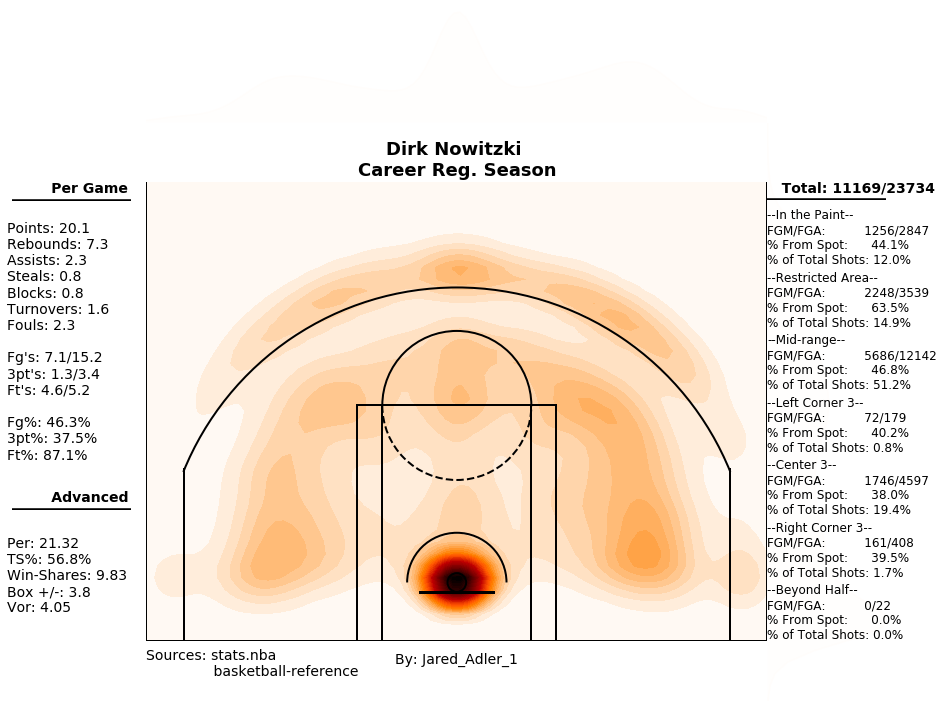

In [25]:
cmap=plt.cm.gist_heat_r

joint_shot_chart_kde = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(1), cmap=cmap,n_levels= 50)

joint_shot_chart_kde.ax_marg_x.set_axis_off()
joint_shot_chart_kde.ax_marg_y.set_axis_off()


joint_shot_chart_kde.fig.set_size_inches(12,11)


# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart_kde.ax_joint
draw_court(ax)


# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(-47.5,322.5)
ax.set_aspect('equal')

# Get rid of axis labels and tick marks
ax.set(xticks=[])
ax.set(yticks=[])
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
ax.axis('off')


# # Optional: Add player picture
# img = OffsetImage(player_pic, zoom=0.5)

# img.set_offset((625,502))
# ax.add_artist(img)

# Add a title
ax.set_title(f'{player} \nCareer Reg. Season', 
             y=1.2, fontsize=18,fontweight = 'bold')

ax.text(-250,-75,f'''Sources: stats.nba
               basketball-reference''',
        fontsize=14)
ax.text(-50,-65,'By: Jared_Adler_1',
        fontsize=14)

# Career Averages Summary

ax.text(-350,314,'      Per Game   ',size = 14,fontweight='bold')
ax.text(-358,310,'_________________',size = 14,fontweight='bold')

ax.text(-362,73,career_averages,size = 14)

#Advance Stat Summary
ax.text(-350,65,'      Advanced   ',size = 14,fontweight='bold')
ax.text(-358,61,'_________________',size = 14,fontweight='bold')

ax.text(-362,-50,advanced_stats,size = 14)


#Career Shot Summary

plt.text(0,278,f'   Total: {t_shots} ',size = 14,fontweight='bold')
plt.text(0,275,'_________________',size = 14,fontweight='bold')

plt.text(0,232,paint_summary_plot,size = 12)
plt.text(0,192,ra_summary_plot,size = 12)
plt.text(0,152,mid_range_summary_plot,size = 12)
plt.text(0,112,l_corner_3_summary_plot,size = 12)
plt.text(0,72,center_3_summary_plot,size = 12)
plt.text(0,32,r_corner_3_summary_plot,size = 12)
plt.text(0,-8,backcourt_summary_plot,size = 12)


plt.show()


# Optional: Save image
player1 = "_".join(player.split())
player_career_kde = f'{player1}_career_kde.png'
joint_shot_chart_kde.savefig(player_career_kde)

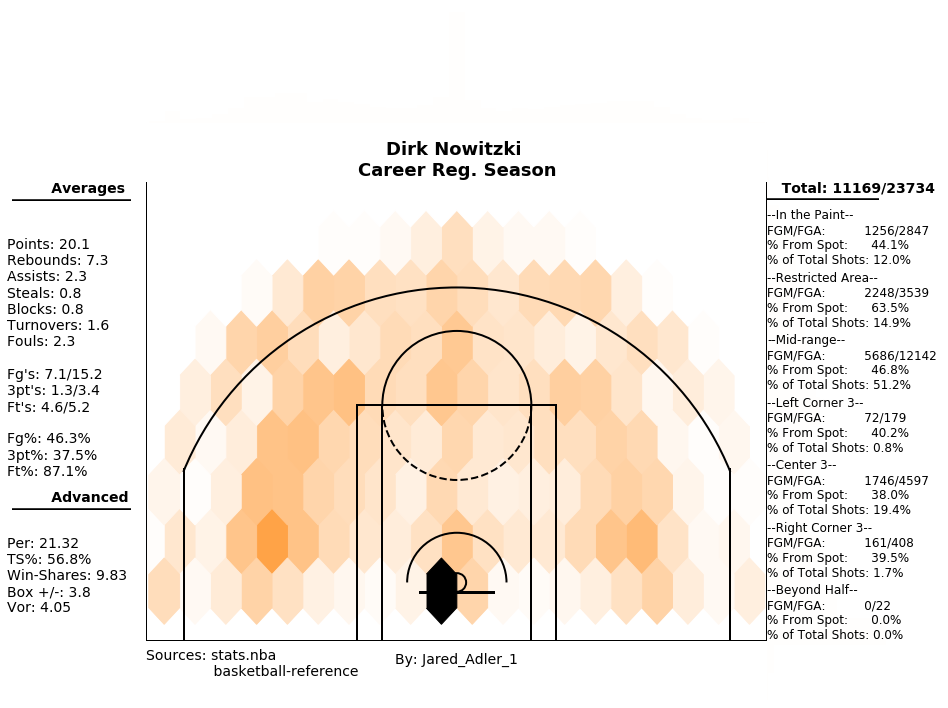

In [26]:
cmap=plt.cm.gist_heat_r

joint_shot_chart_hex = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y,
                                 kind='hex', space=0, color=cmap(1), cmap=cmap,gridsize=20)
joint_shot_chart_hex.ax_marg_x.set_axis_off()
joint_shot_chart_hex.ax_marg_y.set_axis_off()


joint_shot_chart_hex.fig.set_size_inches(12,11)

# A joint plot has 3 ax1es, the first one called ax1_joint 
# is the one we want to draw our court onto and adjust some other settings
ax1 = joint_shot_chart_hex.ax_joint
draw_court(ax1)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax1.set_xlim(250,-250)
ax1.set_ylim(-47.5,322.5)
ax1.set_aspect('equal')

# Get rid of axis labels and tick marks
ax1.set(xticks=[])
ax1.set(yticks=[])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(labelbottom='off', labelleft='off')
ax1.axis('off')

# # Optional: Add player picture
# img = OffsetImage(player_pic, zoom=0.5)

# img.set_offset((625,502))
# ax1.add_artist(img)

# Add a title
ax1.set_title(f'{player} \nCareer Reg. Season', 
             y=1.2, fontsize=18,fontweight = 'bold')

ax1.text(250,-75,f'''Sources: stats.nba
               basketball-reference''',
        fontsize=14)
ax1.text(50,-65,'By: Jared_Adler_1',
        fontsize=14)

#Career Averages Summary

ax1.text(350,314,'      Averages   ',size = 14,fontweight='bold')
ax1.text(358,310,'_________________',size = 14,fontweight='bold')

ax1.text(362,60,career_averages,size = 14)

#Advance Stat Summary
ax1.text(350,65,'      Advanced   ',size = 14,fontweight='bold')
ax1.text(358,61,'_________________',size = 14,fontweight='bold')

ax1.text(362,-50,advanced_stats,size = 14)


#Career Shot Summary

plt.text(0,278,f'   Total: {t_shots} ',size = 14,fontweight='bold')
plt.text(0,275,'________________',size = 14,fontweight='bold')

plt.text(0,232,paint_summary_plot,size = 12)
plt.text(0,192,ra_summary_plot,size = 12)
plt.text(0,152,mid_range_summary_plot,size = 12)
plt.text(0,112,l_corner_3_summary_plot,size = 12)
plt.text(0,72,center_3_summary_plot,size = 12)
plt.text(0,32,r_corner_3_summary_plot,size = 12)
plt.text(0,-8,backcourt_summary_plot,size = 12)


plt.show()


# Optional: Save image
player1 = "_".join(player.split())
player_career_hex= f'{player1}_career_hex.png'
joint_shot_chart_hex.savefig(player_career_hex)

In [27]:
# Executive Summary

print(f'{player} shots during his career:')
print('_______________________________________')
print('\n')
print(paint_summary)
print('\n')
print(ra_summary)
print('\n')
print(mid_range_summary)
print('\n')
print(l_corner_3_summary)
print('\n')
print(center_3_summary)
print('\n')
print(r_corner_3_summary)
print('\n')
print(backcourt_summary)

Dirk Nowitzki shots during his career:
_______________________________________


He shot 1256/2847 from the in the paint, making 44.1% of them.
This means he took 5.3% of his total shots from the in the paint.


He shot 2248/3539 from the restricted area, making 63.5% of them.
This means he took 9.5% of his total shots from the restricted area.


He shot 5686/12142 from the mid-range, making 46.8% of them.
This means he took 24.0% of his total shots from the mid-range.


He shot 72/179 from the left corner 3, making 40.2% of them.
This means he took 0.3% of his total shots from the left corner 3.


He shot 1746/4597 from the center 3, making 38.0% of them.
This means he took 7.4% of his total shots from the center 3.


He shot 161/408 from the right corner 3, making 39.5% of them.
This means he took 0.7% of his total shots from the right corner 3.


He shot 0/22 from the backcourt, making 0.0% of them.
This means he took 0.0% of his total shots from the backcourt.


# Next Steps (W.I.P)

In [28]:
#Create Database
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["Basketball_Reference_Advanced_Stats_db"]

In [29]:
print(myclient.list_database_names())

['Basketball_Reference_Advanced_Stats_db', 'admin', 'classDB', 'config', 'craigslist_db', 'local']


In [30]:
#The goal here is to create a database so that I won't have to make api calls to get bleacher reports advanced data each year
br_data = client.players_advanced_season_totals(season_end_year=2020)

br_data = pd.DataFrame(br_data)

pd.DataFrame(br_data)

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals
0,adamsst01,Steven Adams,[Position.CENTER],26,Team.OKLAHOMA_CITY_THUNDER,61,1654,20.6,0.607,0.006,0.424,14.0,23.8,19.1,13.4,1.5,3.5,14.3,17.3,3.8,2.6,6.4,0.187,2.0,1.1,3.0,2.1,False
1,adebaba01,Bam Adebayo,[Position.POWER_FORWARD],22,Team.MIAMI_HEAT,71,2401,20.4,0.598,0.018,0.487,8.6,25.0,17.1,24.0,1.7,3.8,17.6,21.2,4.6,3.9,8.5,0.169,1.4,2.0,3.4,3.3,False
2,aldrila01,LaMarcus Aldridge,[Position.CENTER],34,Team.SAN_ANTONIO_SPURS,53,1754,19.7,0.571,0.198,0.241,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.4,3.0,1.4,4.5,0.123,1.8,-0.5,1.3,1.5,False
3,alexaky01,Kyle Alexander,[Position.POWER_FORWARD],23,Team.MIAMI_HEAT,1,1,0.0,0.000,0.000,0.000,100.0,0.0,56.1,0.0,0.0,0.0,0.0,44.1,0.0,0.0,0.0,-0.491,-2.8,-11.4,-14.2,0.0,False
4,alexani01,Nickeil Alexander-Walker,[Position.SHOOTING_GUARD],21,Team.NEW_ORLEANS_PELICANS,46,555,8.0,0.454,0.512,0.129,1.5,14.3,7.9,20.5,1.3,1.2,15.5,22.8,-0.8,0.4,-0.3,-0.030,-3.4,-1.0,-4.4,-0.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,youngtr01,Trae Young,[Position.POINT_GUARD],21,Team.ATLANTA_HAWKS,60,2120,23.9,0.595,0.455,0.448,1.6,11.5,6.5,45.6,1.4,0.3,16.2,34.9,5.3,0.6,5.9,0.133,6.3,-2.3,4.0,3.2,False
586,zelleco01,Cody Zeller,[Position.CENTER],27,Team.CHARLOTTE_HORNETS,58,1341,18.8,0.576,0.157,0.374,12.6,21.2,16.7,11.3,1.5,1.7,11.9,20.8,2.3,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5,False
587,zellety01,Tyler Zeller,[Position.CENTER],30,Team.SAN_ANTONIO_SPURS,2,4,22.4,0.250,0.000,0.000,80.8,27.0,53.9,0.0,0.0,0.0,0.0,43.2,0.0,0.0,0.0,-0.075,-0.5,-22.3,-22.8,0.0,False
588,zizican01,Ante Žižić,[Position.CENTER],23,Team.CLEVELAND_CAVALIERS,22,221,16.4,0.597,0.000,0.264,9.0,24.4,16.6,4.2,1.5,1.9,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1,False
